# Normalización de un vector

Dado un arreglo:
$$
v \in R^{n}
$$
Cuyos elementos cumplen:
$$
v_{i} \in [-10,10]
$$
Se le pide normalizar el arreglo considerando que $\mu$ es la media aritmética de los elementos de $v$ y $\sigma$ es la desviación estándar de los elementos de $v$.

Los elementos del arreglo de salida deben tener esa forma:
$$
o_{i} = (v_{i} - \mu) / \sigma
$$
Luego de normalizar todos los elementos del vector se debe cumplir que $\mu_{o}$ es $0$ y $\sigma_{o}$ es $1$.

Consideraciones para su solución:

- Tome en cuenta la precisión, pero sin priorizarla sobre la rapidez.
- Deberá trabajar con arreglos `numpy`.
- Su función en *Python* que normalizará el arreglo de entrada no puede emplear funciones de ningún módulo, ni predefinidas por el entorno.
- Su función en *C* que normalizará el arreglo de entrada solo puede emplear como función auxiliar la función `sqrt` o alguna de sus variantes.

In [984]:
import random

In [985]:
import numpy as np

In [986]:
def crear_arreglo(tam):
  rango_min = -10.0
  rango_max = 10.0
  return np.asarray([random.uniform(rango_min, rango_max) for _ in range(tam)], dtype=np.float32)

a) (0.5 ptos) Usar la función `crear_arreglo` para crear un arreglo de 16 elementos.

In [987]:
# Crear un arreglo de 16 elementos
arreglo = crear_arreglo(16)
print(arreglo)

[-2.335396    3.6354356  -6.7217646  -6.8257556  -9.556125   -5.02659
  8.1518      0.11626727 -1.300673    0.0481489  -0.26383305  3.0757291
  5.2987847  -8.775851    8.56022     2.1163728 ]


b) (2.0 ptos) Implementar en *Python* la función `py_normalizar_arreglo`. Debe recibir un arreglo y devolver el arreglo normalizado.

In [988]:
def py_normalizar_arreglo(v):
    suma = 0
    suma_cuadrados = 0
    n = len(v)

    for elemento in v:
        suma += elemento
        suma_cuadrados += elemento ** 2

    mu = suma / n
    sigma = ((suma_cuadrados - n * mu ** 2) / (n - 1)) ** 0.5 if n > 1 else 0
    arreglo_norm = [(elemento - mu) / sigma for elemento in v]

    return arreglo_norm

c) (0.5 pto) Pruebe la función `py_normalizar_vector` en el arreglo que creó en el ítem (a), y con las funciones `mean` y `stdev` del módulo `statistics` compruebe que la media del arreglo normalizado es cero y la desviación estándar es uno.

In [989]:
import statistics

# Usar la función py_normalizar_arreglo en el arreglo creado
arreglo_normalizado_py = py_normalizar_arreglo(arreglo)

# Calcular la media y la desviación estándar del arreglo normalizado usando statistics
media_normalizada = statistics.mean(arreglo_normalizado_py)
desviacion_normalizada = statistics.stdev(arreglo_normalizado_py)

# Imprimir resultados
print("Arreglo normalizado:", arreglo_normalizado_py)
print("Media del arreglo normalizado:", media_normalizada)
print("Desviación estándar del arreglo normalizado:", desviacion_normalizada)


Arreglo normalizado: [-0.30403807536798005, 0.7497532266880136, -1.0781876865337905, -1.0965410502499222, -1.578423537744279, -0.7790065241795096, 1.5468458258921458, 0.12865566715329502, -0.12141993935156434, 0.1166334640021001, 0.06157181134819857, 0.6509707078550977, 1.0433175031743724, -1.4407131797479948, 1.6189277498365426, 0.48165403722527467]
Media del arreglo normalizado: 1.734723475976807e-18
Desviación estándar del arreglo normalizado: 0.9999999999999999


d) (3.0 ptos) Implementar la función `normalizar_vector` en *C*.

In [990]:
%%file normalizar.c
#include <stdio.h>
#include <math.h>

void normalizar(float *v, int n, float *v_final) {
    // Calcular la media
    float suma = 0;
    for (int i = 0; i < n; i++) {
        suma += v[i];
    }
    float mu = suma / n;

    // Calcular la suma de los cuadrados de las diferencias
    float suma_cuadrados = 0;
    for (int i = 0; i < n; i++) {
        suma_cuadrados += (v[i] - mu) * (v[i] - mu);
    }

    // Calcular la desviación estándar
    float sigma = sqrt(suma_cuadrados / (n - 1));

    // Normalizar el arreglo
    for (int i = 0; i < n; i++) {
        v_final[i] = (v[i] - mu) / sigma;
    }
}

Overwriting normalizar.c


e) (0.5 ptos) Compile su archivo de *C* para generar la *shared library*

In [991]:
!gcc -c normalizar.c -o normalizar.o
!gcc -shared normalizar.o -o normalizar.so -lm

f) (1.0 pto) Implemente la función `ctypes_normalizar_vector` que devuelva la función implementada en C configurada para usarse.

In [992]:
import ctypes
import numpy as np

def ctypes_normalizar_vector(v):
    # Cargar la shared library
    lib = ctypes.CDLL('./normalizar.so')

    # Definir el tipo de datos de los argumentos y el tipo de retorno
    lib.normalizar.argtypes = [np.ctypeslib.ndpointer(dtype=np.float32), ctypes.c_int, np.ctypeslib.ndpointer(dtype=np.float32)]
    lib.normalizar.restype = None

    # Convertir el arreglo de entrada a un arreglo de tipo float32
    v = np.asarray(v, dtype=np.float32)

    # Crear un arreglo de salida del mismo tamaño
    v_normalizado = np.zeros_like(v, dtype=np.float32)

    # Llamar a la función de C
    lib.normalizar(v, len(v), v_normalizado)

    return v_normalizado


g) (0.5 ptos) Haga una instancia de la función

In [993]:
arreglo_normalizado_ctypes = ctypes_normalizar_vector(arreglo)


h) (1.0 pto) Implementar en *Python* la función `c_normalizar_vector`. Debe recibir un arreglo, y devolver un arreglo normalizado a partir de la instancia de su función *C* ya configurada que hizo en el ítem anterior.

In [994]:
# Definir la función c_normalizar_vector
def c_normalizar_vector(v):
    arreglo_normalizado_ctypes = ctypes_normalizar_vector(v)
    return arreglo_normalizado_ctypes


i) (0.5 ptos) Pruebe la función `c_normalizar_vector` en el arreglo que creó en el ítem (a), y con las funciones `mean` y `stdev` del módulo `statistics` compruebe que la media del arreglo normalizado es cero y la desviación estándar es uno.

In [995]:
import numpy as np
from statistics import mean, stdev

# Llamar a la función c_normalizar_vector
arreglo_normalizado_c = c_normalizar_vector(arreglo)

# Convertir el arreglo normalizado a float64
arreglo_normalizado_c_float64 = np.array(arreglo_normalizado_c, dtype=np.float64)

# Calcular la media y la desviación estándar del arreglo normalizado usando statistics
media_normalizada = statistics.mean(arreglo_normalizado_c_float64)
desviacion_normalizada = statistics.stdev(arreglo_normalizado_c_float64)

# Imprimir resultados
print("Arreglo normalizado (C):", arreglo_normalizado_c)
print("Media del arreglo normalizado:", media_normalizada)
print("Desviación estándar del arreglo normalizado:", desviacion_normalizada)

# Llamar a la función c_normalizar_vector
#arreglo_normalizado_c = c_normalizar_vector(arreglo)

# Calcular la media y la desviación estándar del arreglo normalizado usando statistics
#media_normalizada = statistics.mean(arreglo_normalizado_c)
#desviacion_normalizada = statistics.stdev(arreglo_normalizado_c, media_normalizada)

# Imprimir resultados
#print("Arreglo normalizado (C):", arreglo_normalizado_c)
#print("Media del arreglo normalizado:", media_normalizada)
#print("Desviación estándar del arreglo normalizado:", desviacion_normalizada)


Arreglo normalizado (C): [-0.30403808  0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.        ]
Media del arreglo normalizado: -0.019002379849553108
Desviación estándar del arreglo normalizado: 0.07600951939821243


In [996]:
from numpy import linalg as LA

In [997]:
def error_relativo(ref, val):
  return LA.norm((ref - val)) / LA.norm(ref)

j) (0.25 ptos) Emplee la función `error_relativo` para calcular el error relativo de su resultado en *C* con respecto a su resultado en *Python*

In [998]:
# Calcular el error relativo
error_rel_py_vs_c = error_relativo(arreglo_normalizado_py, arreglo_normalizado_c)

# Imprimir el resultado y el error relativo
print("Error relativo entre Python y C:", error_rel_py_vs_c)

Error relativo entre Python y C: 0.9969139330529503


k) (0.25 ptos) Haga un **arreglo** de potencias de 2 que varién desde la potencia 10 hasta la potencia 19.

In [999]:
# Crear un arreglo de potencias de 2 desde 2^10 hasta 2^19
potencias_de_dos = np.power(2, np.arange(10, 20))

# Imprimir el arreglo
print(potencias_de_dos)

[  1024   2048   4096   8192  16384  32768  65536 131072 262144 524288]


l) (0.5 ptos) Realizar 50 mediciones de tiempo para las funciones implementadas en *C* y *Python* para el menor de los tamaños.

In [1000]:
import time

# Celda para calcular y presentar tiempos en Python
N = 1024
iterations = 50
py_values = []
c_values = []


for i in range(iterations):
    py_start_time = time.time()
    rpta1 = py_normalizar_arreglo(arreglo)
    py_end_time = time.time()
    py_values.append(py_end_time - py_start_time)

py_median_time = np.median(py_values)

print(f"Tiempo de ejecución mediano en Python: {py_median_time} s")

for i in range(iterations):
    c_start_time = time.time()
    rpta2 = ctypes_normalizar_vector(arreglo)
    c_end_time = time.time()
    c_values.append(c_end_time - c_start_time)

c_median_time = np.median(c_values)

print(f"Tiempo de ejecución mediano en C: {c_median_time} s")
 

Tiempo de ejecución mediano en Python: 8.881092071533203e-05 s
Tiempo de ejecución mediano en C: 0.00016236305236816406 s


m) (0.5 ptos) Presente una gráfica para las mediciones de tiempo de la función en *Python*. Incluya la mediana de los tiempos en el gráfico.

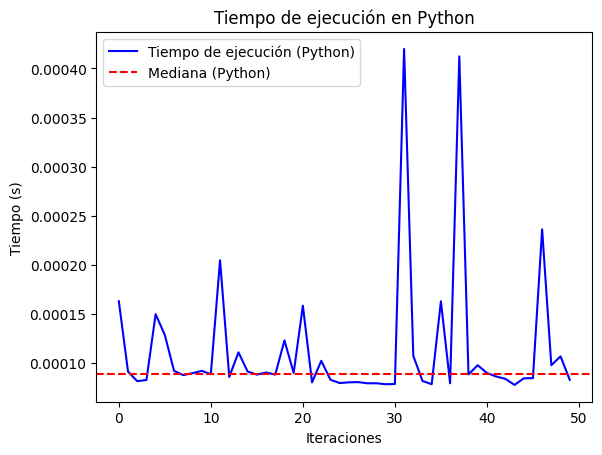

In [1001]:
import numpy as np
import matplotlib.pyplot as plt

# Crear la gráfica para Python
plt.plot(range(iterations), py_values, color='blue', label='Tiempo de ejecución (Python)')
plt.axhline(y=py_median_time, color='red', linestyle='--', label='Mediana (Python)')
plt.xlabel('Iteraciones')
plt.ylabel('Tiempo (s)')
plt.title('Tiempo de ejecución en Python')
plt.legend()
plt.show()        

n) (0.5 ptos) Presente una gráfica para las mediciones de tiempo de la función en *C*. Incluya la mediana de los tiempos en el gráfico.

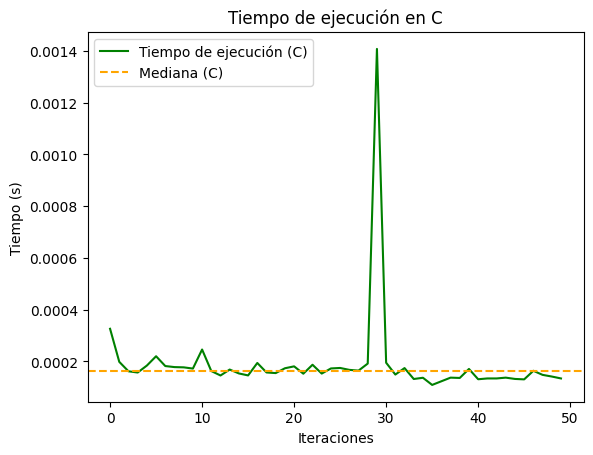

In [1002]:
plt.plot(range(iterations), c_values, color='green', label='Tiempo de ejecución (C)')
plt.axhline(y=c_median_time, color='orange', linestyle='--', label='Mediana (C)')
plt.xlabel('Iteraciones')
plt.ylabel('Tiempo (s)')
plt.title('Tiempo de ejecución en C')
plt.legend()
plt.show()

o) (0.5 pto) Realizar 50 mediciones de tiempo para las funciones implementadas en *C* y *Python* para el mayor de los tamaños.

In [1003]:
import time

# Celda para calcular y presentar tiempos en Python
N = 524288
iterations = 50
py_values = []
c_values = []


for i in range(iterations):
    py_start_time = time.time()
    rpta1 = py_normalizar_arreglo(arreglo)
    py_end_time = time.time()
    py_values.append(py_end_time - py_start_time)

py_median_time = np.median(py_values)

print(f"Tiempo de ejecución mediano en Python: {py_median_time} s")

for i in range(iterations):
    c_start_time = time.time()
    rpta2 = ctypes_normalizar_vector(arreglo)
    c_end_time = time.time()
    c_values.append(c_end_time - c_start_time)

c_median_time = np.median(c_values)

print(f"Tiempo de ejecución mediano en C: {c_median_time} s")

Tiempo de ejecución mediano en Python: 5.412101745605469e-05 s
Tiempo de ejecución mediano en C: 0.0001010894775390625 s


p) (0.5 ptos) Presente una gráfica para las mediciones de tiempo de la función en *Python*. Incluya la mediana de los tiempos en el gráfico.

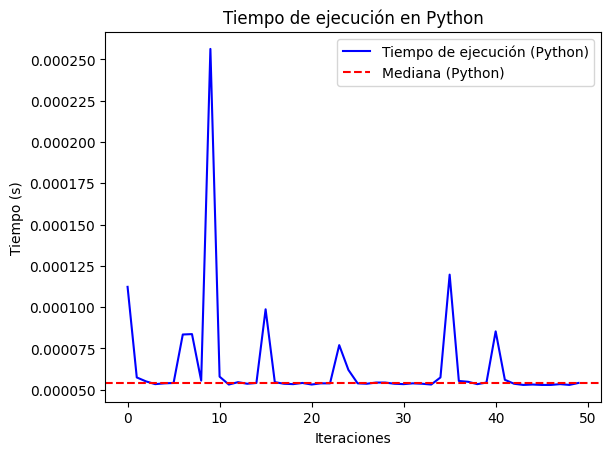

In [1004]:
# Crear la gráfica para Python
plt.plot(range(iterations), py_values, color='blue', label='Tiempo de ejecución (Python)')
plt.axhline(y=py_median_time, color='red', linestyle='--', label='Mediana (Python)')
plt.xlabel('Iteraciones')
plt.ylabel('Tiempo (s)')
plt.title('Tiempo de ejecución en Python')
plt.legend()
plt.show()  

q) (0.5 ptos) Presente una gráfica para las mediciones de tiempo de la función en *C*. Incluya la mediana de los tiempos en el gráfico.

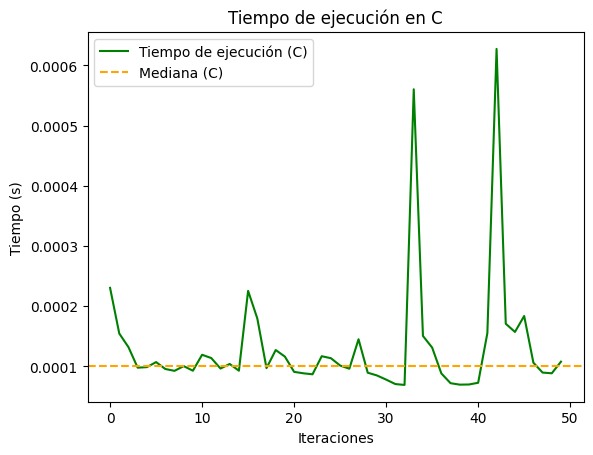

In [1005]:
plt.plot(range(iterations), c_values, color='green', label='Tiempo de ejecución (C)')
plt.axhline(y=c_median_time, color='orange', linestyle='--', label='Mediana (C)')
plt.xlabel('Iteraciones')
plt.ylabel('Tiempo (s)')
plt.title('Tiempo de ejecución en C')
plt.legend()
plt.show()

r) (0.5 ptos) Realizar 50 mediciones de tiempo y error relativo para las funciones implementadas en *C* y *Python* para todos los tamaños. El elemento representativo de cada tamaño será la mediana de las 50 mediciones.

In [1006]:
# Realizar mediciones para diferentes tamaños
N_values = [16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8192]


# Celda para calcular y presentar tiempos en Python y C
iterations = 50


py_median_times = []
c_median_times = []

for N in N_values:
    py_values = []
    c_values = []

    print(f"--------- Para {N} : ------------")
    for i in range(iterations):
        py_start_time = time.time()
        rpta1 = py_normalizar_arreglo(arreglo)
        py_end_time = time.time()
        py_values.append(py_end_time - py_start_time)

    py_median_time = np.median(py_values)
    py_median_times.append(py_median_time)
    print(f"Tiempo de ejecución mediano en Python: {py_median_time} s")

    for i in range(iterations):
        c_start_time = time.time()
        rpta2 = ctypes_normalizar_vector(arreglo)  # CORRECCIÓN AQUÍ
        c_end_time = time.time()
        c_values.append(c_end_time - c_start_time)

    c_median_time = np.median(c_values)
    c_median_times.append(c_median_time)
    print(f"Tiempo de ejecución mediano en C: {c_median_time} s")



--------- Para 16 : ------------
Tiempo de ejecución mediano en Python: 5.1021575927734375e-05 s
Tiempo de ejecución mediano en C: 9.85860824584961e-05 s
--------- Para 32 : ------------
Tiempo de ejecución mediano en Python: 5.078315734863281e-05 s
Tiempo de ejecución mediano en C: 8.177757263183594e-05 s
--------- Para 64 : ------------
Tiempo de ejecución mediano en Python: 5.0067901611328125e-05 s
Tiempo de ejecución mediano en C: 6.639957427978516e-05 s
--------- Para 128 : ------------
Tiempo de ejecución mediano en Python: 4.8995018005371094e-05 s
Tiempo de ejecución mediano en C: 0.0001316070556640625 s
--------- Para 256 : ------------
Tiempo de ejecución mediano en Python: 0.0001016855239868164 s
Tiempo de ejecución mediano en C: 0.0001316070556640625 s
--------- Para 512 : ------------
Tiempo de ejecución mediano en Python: 5.137920379638672e-05 s
Tiempo de ejecución mediano en C: 7.224082946777344e-05 s
--------- Para 1024 : ------------
Tiempo de ejecución mediano en Pytho

s) (0.5 ptos) Presentar una gráfica de tiempo de ejecución por tamaño a partir de sus mediciones del ítem anterior.

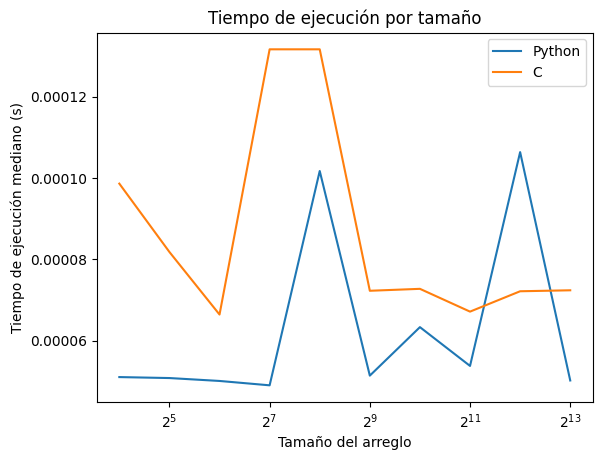

In [1007]:
# Crear la gráfica
plt.plot(N_values, py_median_times, label='Python')
plt.plot(N_values, c_median_times, label='C')
plt.xscale('log', base=2)  # Escala logarítmica para mejor visualización
plt.xlabel('Tamaño del arreglo')
plt.ylabel('Tiempo de ejecución mediano (s)')
plt.title('Tiempo de ejecución por tamaño')
plt.legend()
plt.show()

t) (0.5 ptos) Presentar una gráfica de speedup por tamaño a partir de sus mediciones.

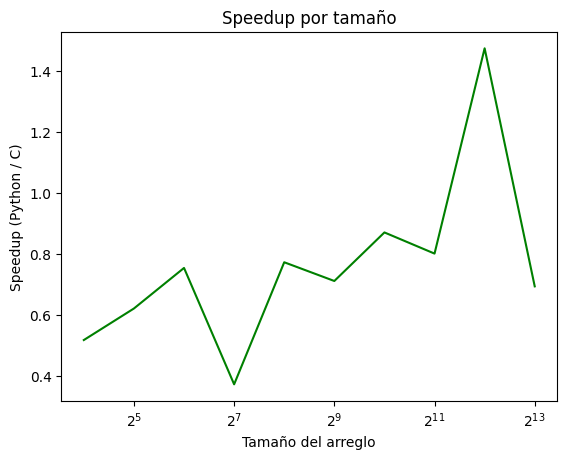

In [1008]:
# Calcular speedup
speedup_values = [py_median_time / c_median_time for py_median_time, c_median_time in zip(py_median_times, c_median_times)]

# Crear la gráfica
plt.plot(N_values, speedup_values, color='green')
plt.xscale('log', base=2)  # Escala logarítmica para mejor visualización
plt.xlabel('Tamaño del arreglo')
plt.ylabel('Speedup (Python / C)')
plt.title('Speedup por tamaño')
plt.show()



u) (0.5 ptos) Presentar una gráfica de error relativo por tamaño a partir de sus mediciones

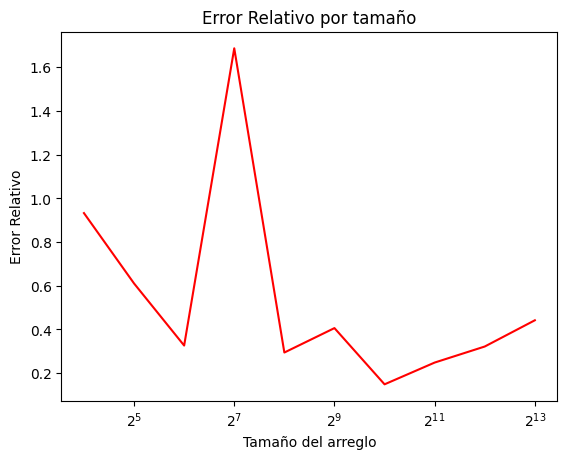

In [1009]:
# Calcular error relativo
error_rel_values = [np.median(np.abs(np.array(py_median_times) - np.array(c_median_times)) / np.array(py_median_times)) for py_median_times, c_median_times in zip(py_median_times, c_median_times)]

# Crear la gráfica
plt.plot(N_values, error_rel_values, color='red')
plt.xscale('log', base=2)  # Escala logarítmica para mejor visualización
plt.xlabel('Tamaño del arreglo')
plt.ylabel('Error Relativo')
plt.title('Error Relativo por tamaño')
plt.show()

